In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\dataset.csv')
df=dataset.copy()

C:\Users\HP\AppData\Local\Temp\ipykernel_18164\599551728.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\dataset.csv')


In [8]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [10]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [11]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)

In [12]:
df['agency'].value_counts()
# date format - mm/dd/yyyy
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [13]:
#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

In [14]:
df.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

In [15]:
#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

In [16]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,396161.000000,394180.000000,366518.000000,167983.000000,9195.00000
mean,10.758950,26.178324,110.372334,227.394736,40.54719
std,11.116237,18.498946,75.322533,153.419324,30.42207
min,0.000000,0.000000,0.000000,0.000000,3.00000
25%,5.000000,14.000000,57.000000,115.000000,24.00000
50%,8.000000,22.000000,91.000000,194.000000,32.00000
75%,13.500000,32.900000,144.000000,306.000000,46.00000
max,909.000000,876.000000,6307.033333,2610.000000,504.00000


In [17]:
df.head(20)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990
5,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,3/1/1990
6,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,4/1/1990
7,Andhra Pradesh,Hyderabad,Industrial Area,4.7,8.7,NaN,NaN,NaN,4/1/1990
8,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,4/1/1990
9,Andhra Pradesh,Hyderabad,Industrial Area,4.0,8.9,NaN,NaN,NaN,5/1/1990


In [18]:
#changing type to only 3 categories
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()

Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

Observations for each location

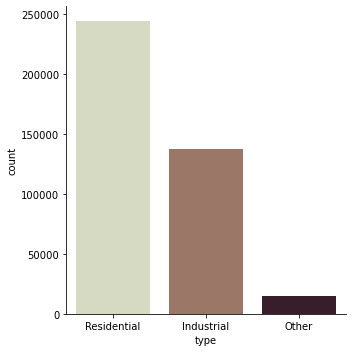

In [19]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.50", data = df)

<AxesSubplot:xlabel='state'>

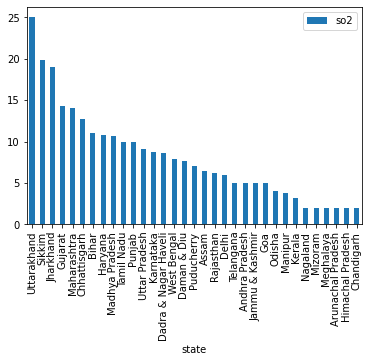

In [20]:
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

<AxesSubplot:xlabel='state'>

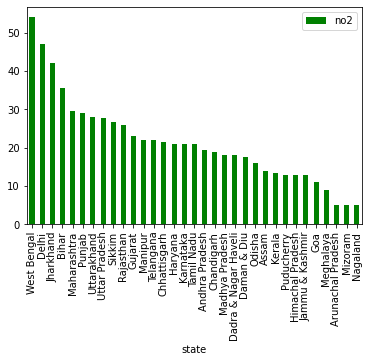

In [21]:
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'g')

<AxesSubplot:xlabel='state'>

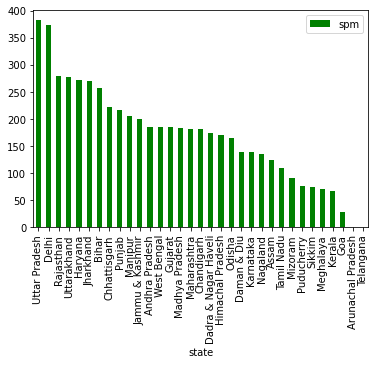

In [22]:
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'g')

<AxesSubplot:xlabel='state'>

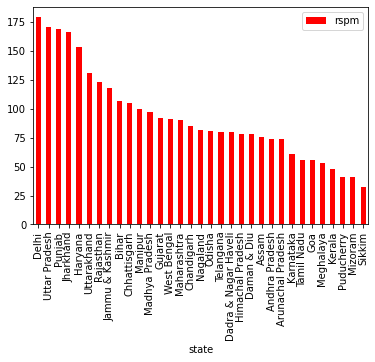

In [23]:
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')

<AxesSubplot:xlabel='state'>

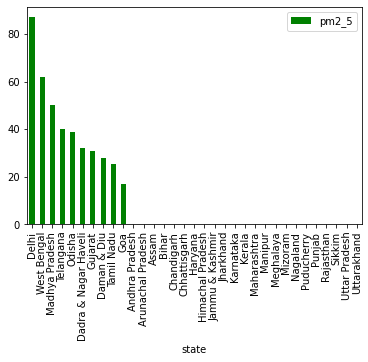

In [24]:
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'g')

STATISTICAL ANALYSIS-

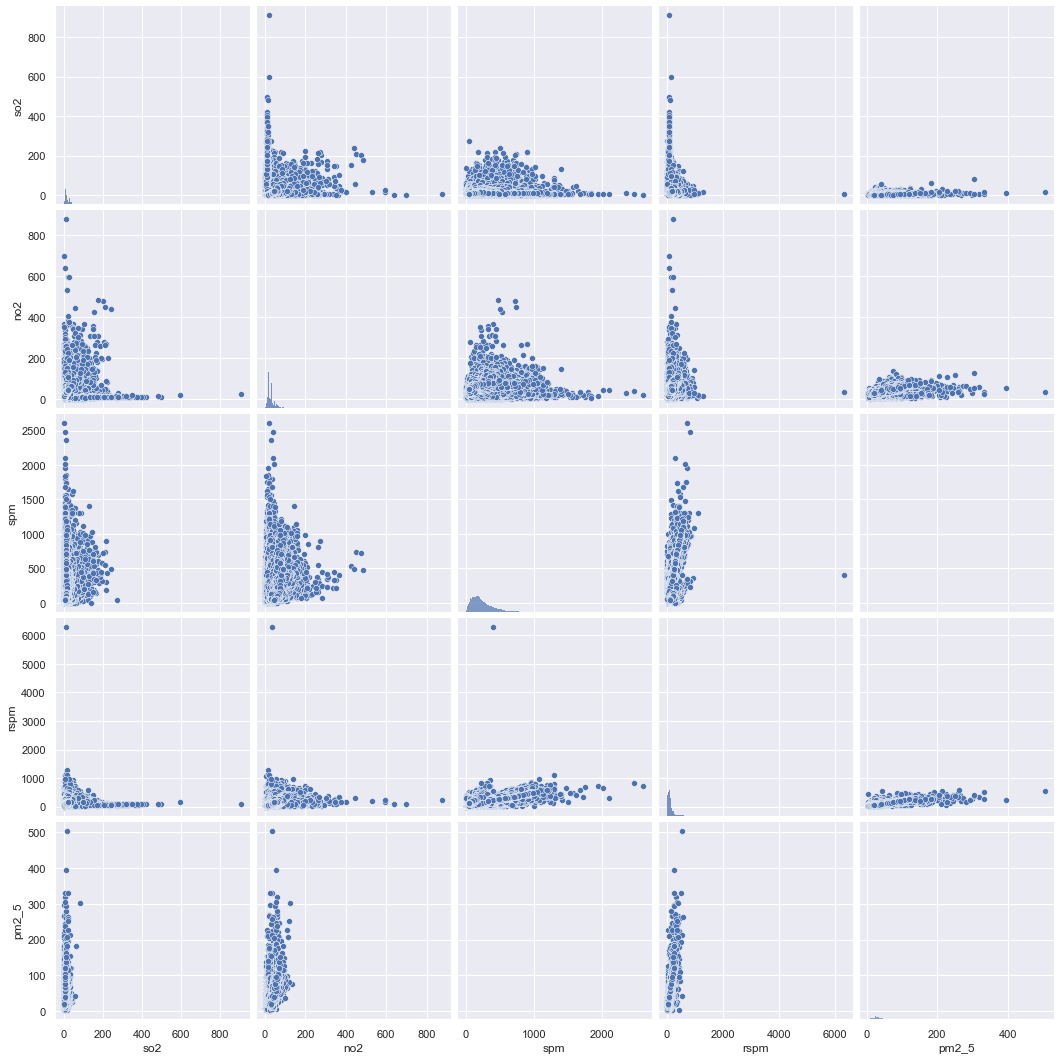

In [38]:
#scatterplot
sns.set()
cols = ['so2', 'no2', 'spm', 'rspm', 'pm2_5']
sns.pairplot(df[cols], height = 3.0)
plt.show()

Correlation matrix

<AxesSubplot:>

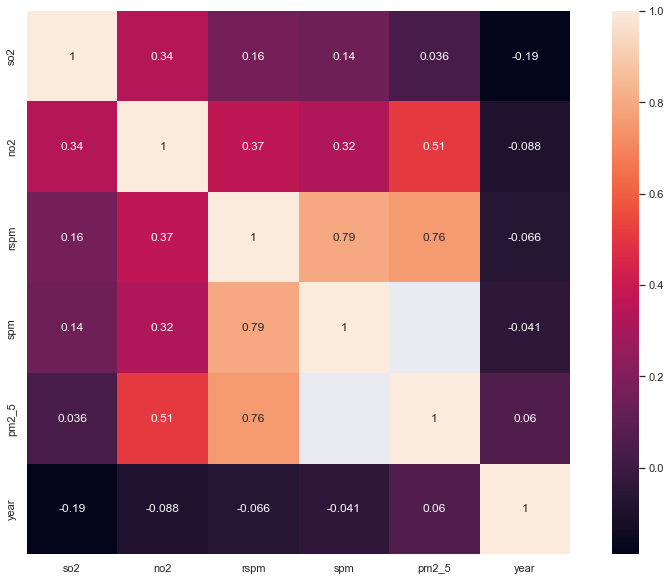

In [54]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix, vmax = 1, square = True, annot = True)

In [39]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [40]:
# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


In [41]:
#HEATMAP

<AxesSubplot:title={'center':'so2 by state and year'}, xlabel='year', ylabel='state'>

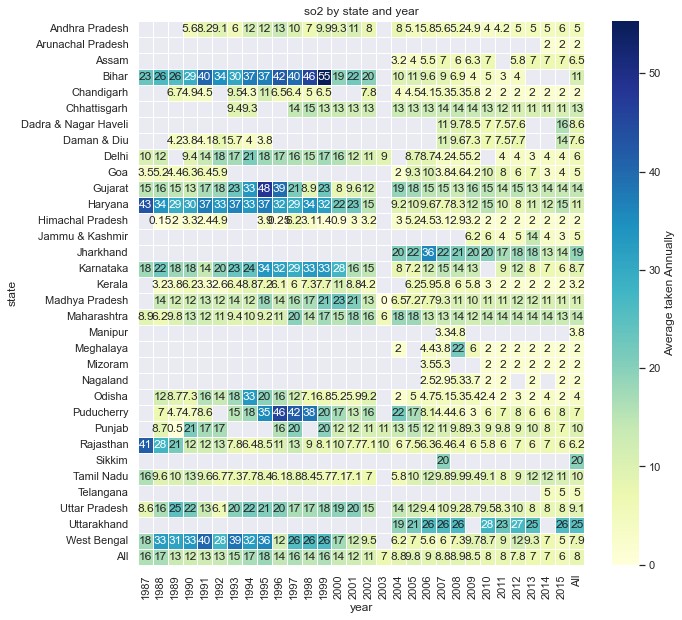

In [42]:
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

<AxesSubplot:title={'center':'no2 by state and year'}, xlabel='year', ylabel='state'>

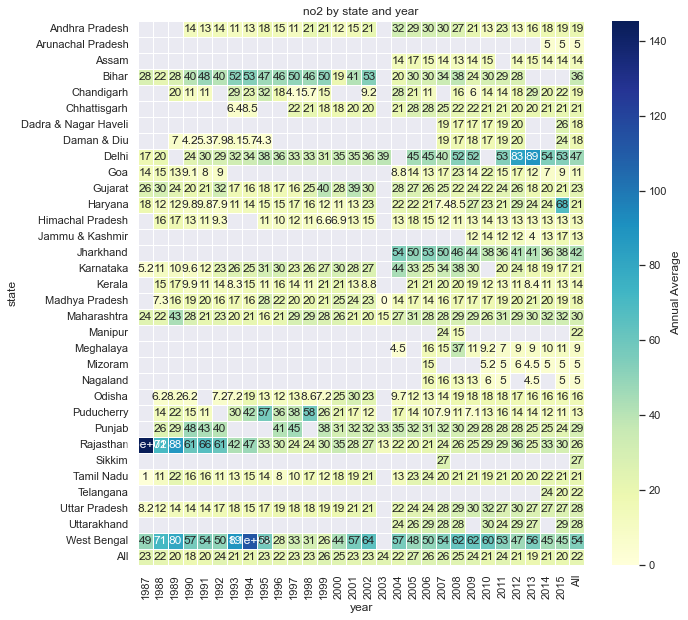

In [43]:
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

<AxesSubplot:xlabel='location'>

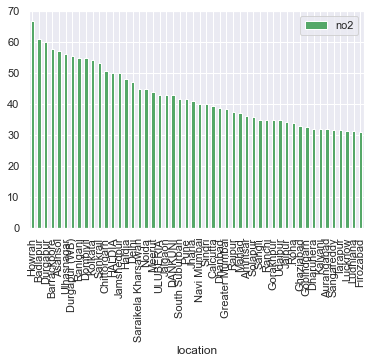

In [44]:
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'g')

<AxesSubplot:xlabel='location'>

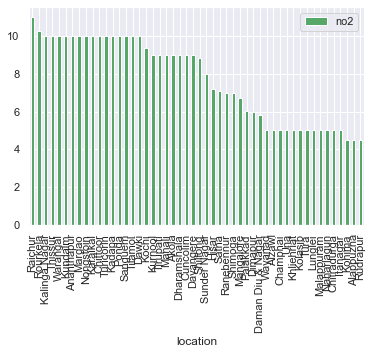

In [45]:
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')

<AxesSubplot:xlabel='location'>

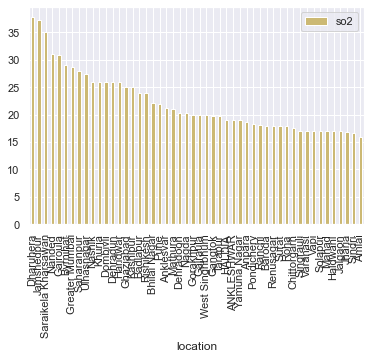

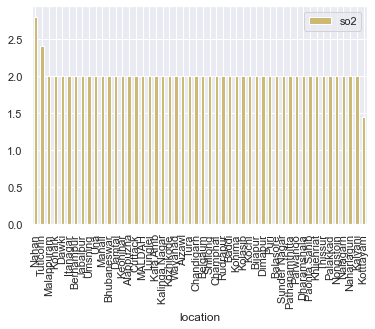

In [46]:
# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'y')

# bar plot of no2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'y')

<AxesSubplot:xlabel='location'>

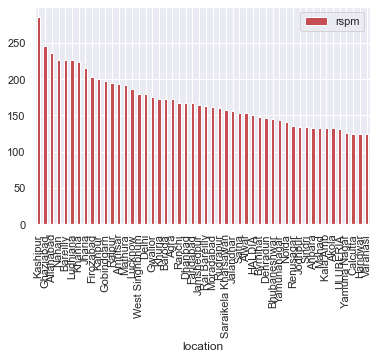

In [47]:
# rspm = PM10 - location wise - first 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')

<AxesSubplot:xlabel='location'>

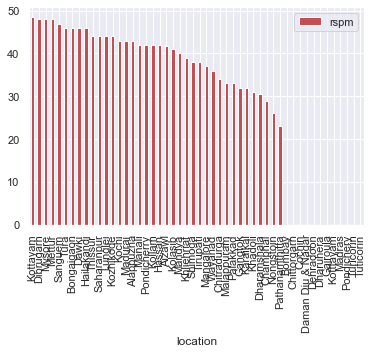

In [48]:
# rspm = PM10 - location wise - last 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(50).plot.bar(color = 'r')

<AxesSubplot:xlabel='location'>

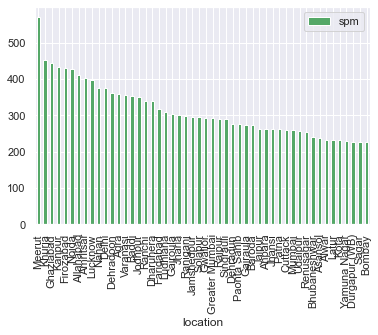

In [49]:
# spm = PM10 - location wise - first 50
df[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(50).plot.bar(color = 'g')

<AxesSubplot:xlabel='location'>

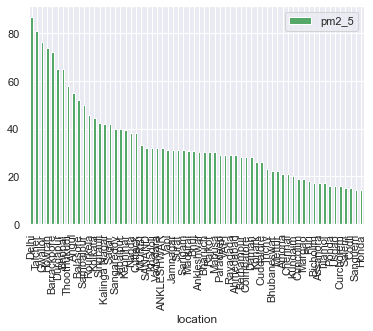

In [50]:
# pm2_5 vs location - all non null values
df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'g')

<AxesSubplot:title={'center':'rspm by state and year'}, xlabel='year', ylabel='state'>

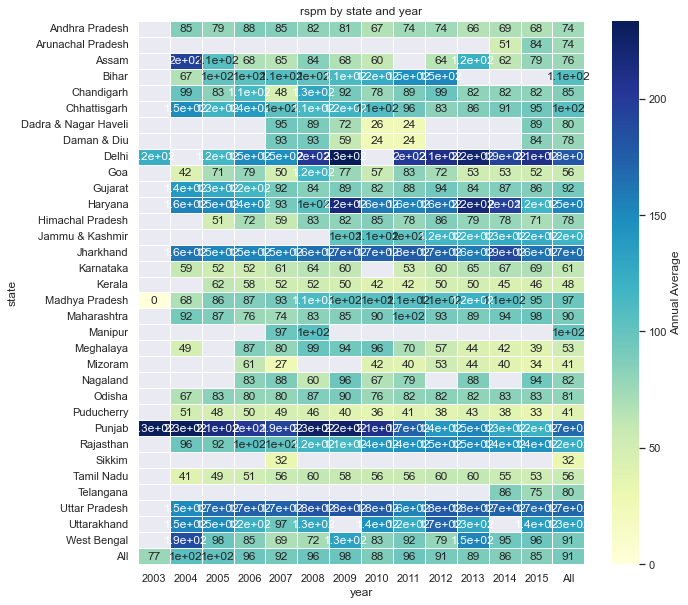

In [51]:
# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(df.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

<AxesSubplot:title={'center':'spm by state and year'}, xlabel='year', ylabel='state'>

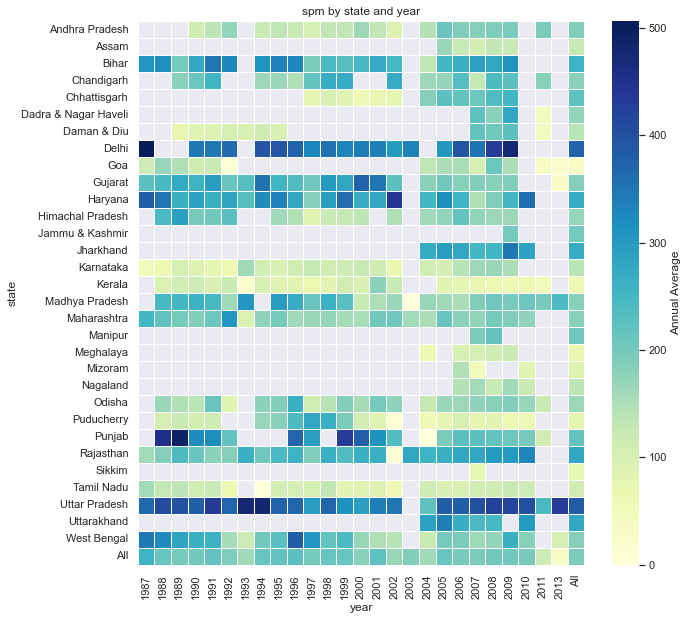

In [52]:
# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})

In [53]:
print(df.shape)

(396157, 10)


CONCLUSION-
 1.From the analysis it is visible that states like Delhi, Punjab, Uttar Pradesh, Haryana are heavily polluted and require Immediate action.
 2.From the scatter plots we see that the states with high rspm concentrations also have high spm concentrations and also conclude from scatter plots that the states with high rspm concentrations also have high spm concentrations
 
